In [3]:
from chessnet.notebook_config import *
from chessnet.communities import get_algorithms, get_community_filename, write_louvain_q_values

In [19]:
def get_q_values(database):
    algorithm_names = get_algorithms().keys()
    q_values = {}
    for name in algorithm_names:
        print(name)
        filename = get_community_filename(database, name)
        if not filename.is_file():
            continue
        comms = pickle.load(open(filename, "rb"))
        q = comms.newman_girvan_modularity().score
        q_values[name] = q

    for name in algorithm_names:
        if name not in q_values:
            q_values[name] = np.nan

    return q_values

In [4]:
database = Database.OTB
write_louvain_q_values(database)

KeyboardInterrupt: 

In [20]:
all_q_values = {
    "OTB": get_q_values(Database.OTB),
    "Portal": get_q_values(Database.Portal),
}

leiden
label_propagation
louvain_0.1000
louvain_0.1668
louvain_0.2783
louvain_0.4642
louvain_0.7743
louvain_1.2915
louvain_2.1544
louvain_3.5938
louvain_5.9948
louvain_10.0000


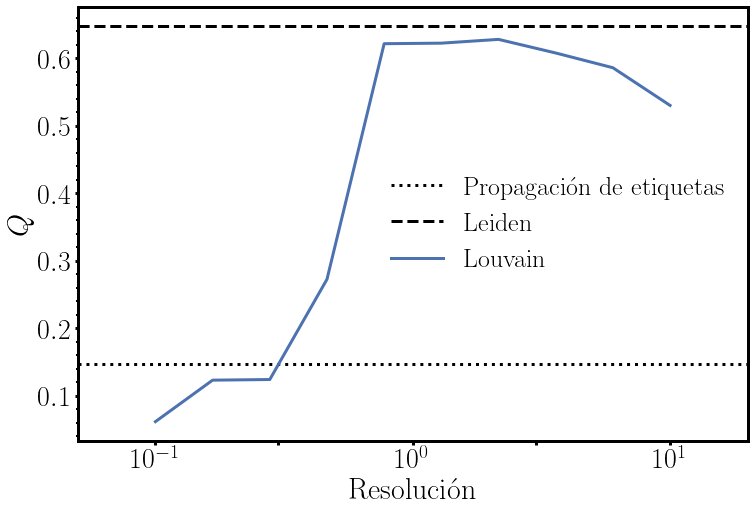

In [7]:
ncols, nrows = 2, 1
fig, axes = plt.subplots(figsize=(6*ncols, 5*nrows), ncols=ncols, nrows=nrows)
for i, (name, q_values) in enumerate(all_q_values.items()):
    ax.set_ylabel(r"$Q$")
    ax.set_xlabel("Resolución")
    ax.axhline(
        q_values["label_propagation"],
        linestyle=':',
        label="Propagación de etiquetas",
        color="k"
    )
    ax.axhline(q_values["leiden"], linestyle='--', label="Leiden", color="k")

    louvains = np.array([
        [float(name.split("_")[1]), q]
        for name, q in q_values.items()
        if name.startswith("louvain")
    ])
    resolutions = louvains[:,0]
    louvain_q_values = louvains[:,1]
    marker = "o" if name == "OTB" else "s"
    ax.plot(resolutions, louvain_q_values, "-" + marker, label="Louvain", color=f"C{i}")

    ax.set_xscale("log")
    ax.set_xticks([0.1, 0.3, 1, 3., 10])
    ax.set_xlim(5e-2, 20)
    ax.legend(frameon=False)
plt.show()